In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier

In [ ]:
#Importing dataset
df = pd.read_csv('/content/Real_Time_Crop_recommendation system.csv')

In [ ]:
#Data Information
df.head(10)

,N=Nitrogen,P=Phosphorous,K=Potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [ ]:
print("Shape of the datacolumn: ",df.shape)
df.isna().sum()

Shape of the datacolumn:  (2200, 8)


N=Nitrogen       0
P=Phosphorous    0
K=Potassium      0
temperature      0
humidity         0
ph               0
rainfall         0
label            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N=Nitrogen     2200 non-null   int64  
 1   P=Phosphorous  2200 non-null   int64  
 2   K=Potassium    2200 non-null   int64  
 3   temperature    2200 non-null   float64
 4   humidity       2200 non-null   float64
 5   ph             2200 non-null   float64
 6   rainfall       2200 non-null   float64
 7   label          2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.describe()

,N=Nitrogen,P=Phosphorous,K=Potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df.dtypes

N=Nitrogen         int64
P=Phosphorous      int64
K=Potassium        int64
temperature      float64
humidity         float64
ph               float64
rainfall         float64
label             object
dtype: object

In [ ]:
df.notnull().sum()

N=Nitrogen       2200
P=Phosphorous    2200
K=Potassium      2200
temperature      2200
humidity         2200
ph               2200
rainfall         2200
label            2200
dtype: int64

In [ ]:
df.shape

(2200, 8)

In [ ]:
df.size

17600

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

In [ ]:
df.dropna()

,N=Nitrogen,P=Phosphorous,K=Potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
df.columns

Index(['N=Nitrogen', 'P=Phosphorous', 'K=Potassium', 'temperature', 'humidity',
       'ph', 'rainfall', 'label'],
      dtype='object')

In [ ]:
df.describe(include=object)

,label
count,2200
unique,22
top,rice
freq,100


In [ ]:
# Get the distinct values of each column
for column in df.columns:
    unique_val=df[column].unique()
    print("unique values of {} are {}".format(column,unique_val))

unique values of N=Nitrogen are [ 90  85  60  74  78  69  94  89  68  91  93  77  88  76  67  83  98  66
  97  84  73  92  95  99  63  62  64  82  79  65  75  71  72  70  86  61
  81  80 100  87  96  40  23  39  22  36  32  58  59  42  28  43  27  50
  25  31  26  54  57  49  46  38  35  52  44  24  29  20  56  37  51  41
  34  30  33  47  53  45  48  13   2  17  12   6  10  19  11  18  21  16
   9   1   7   8   0   3   4   5  14  15  55 105 108 118 101 106 109 117
 114 110 112 111 102 116 119 107 104 103 120 113 115 133 136 126 121 129
 122 140 131 135 123 125 139 132 127 130 134]
unique values of P=Phosphorous are [ 42  58  55  35  37  53  54  46  56  50  48  38  45  40  59  41  47  49
  51  57  39  43  44  60  52  36  72  67  73  70  62  74  66  63  71  78
  80  68  65  77  76  79  61  64  69  75  24  18  26  27  25  21  30  11
   5  10   7  20  22  15  23   8  16  29  17   6  19  13   9  14  28  94
  95  92  89  88  87  85  86  83  91  81  84  90  82  93  33  31  34  32
 130 144 12

In [ ]:
# Get the distinct values of specified columns
spec_cols = ['N=Nitrogen', 'P=Phosphorous', 'K=Potassium', 'temperature', 'humidity', 'ph', 'rainfall']
for col in spec_cols:
    uni_val=df[col].unique()
    print("----------------------------")
    print(col)
    print("----------------------------")
    for value in uni_val:
        print(value)

Streaming output truncated to the last 5000 lines.
92.04670813
92.00719952
90.90343769
90.26408017
91.5473145
90.31153735
90.14362642
91.22062116
94.45239715
94.39000473
93.63812684
90.72351622
90.10522549
91.28408653
94.25966183
91.97978938
91.98317355
93.36348717
92.9641969
91.06053924
92.15987039
94.8933184
94.35734702
93.48447453
90.4582865
92.03272799
90.26457428
90.22399223
90.60901895
90.65458473
94.01331956
92.39651663
91.35349216
91.38411917
91.34663797
93.37488907
93.24688124
93.04897191
92.87820148
91.90997228
91.74780462
93.52211892
93.12316972
94.14861001
91.94670335
94.55239717
90.93756231
91.13772765
91.68293851
91.11764246
92.18151927
93.10527686
91.15248149
91.48247612
90.03969587
92.86773675
91.52781832
90.95589386
93.72485075
94.02769434
93.67804556
90.91510525
90.50621806
91.81183218
91.69865887
91.81668769
93.68394562
92.22706805
94.96419851
90.15406807
94.35815354
90.19147747
94.78797376
90.50096668
93.75652041
91.71369387
92.13229786
94.51768464
91.22320999
93.43

In [ ]:
#Filtering rows based on the presence of null values using the dropna() method:
filtered_dropna = df.dropna(axis=0) # default axis value is zero ==> rows with missing values are deleted
print("Total records Before:" , df.shape)
print("Total records After:" , filtered_dropna.shape)

Total records Before: (2200, 8)
Total records After: (2200, 8)


In [ ]:
#Filtering rows based on the presence of null values using the dropna() method:

filtered_dropna_2 = df.dropna(axis=1) # ==> columns with missing values are deleted

print("Total records Before:" , df.shape)
print("Total records After:" , filtered_dropna_2.shape)

Total records Before: (2200, 8)
Total records After: (2200, 8)


In [ ]:
dup_test = df[df.duplicated()]
dup_test.shape

(0, 8)

In [ ]:
# Filter rows based on condition'temperature' >= 25
filtered_temperature = df[df['temperature'] >=25 ]
print("Total records:", len(filtered_temperature))
filtered_temperature.head()

Total records: 1235


,N=Nitrogen,P=Phosphorous,K=Potassium,temperature,humidity,ph,rainfall,label
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
10,91,53,40,26.527235,81.417538,5.386168,264.614870,rice
12,78,58,44,26.800796,80.886848,5.108682,284.436457,rice
14,94,50,37,25.665852,80.663850,6.948020,209.586971,rice
21,76,40,43,25.157455,83.117135,5.070176,231.384316,rice


In [ ]:
# Using where condition
filtered_income_data2 = df.where(df['temperature'] >= 25)
print("Total records:", len(filtered_income_data2))
filtered_income_data2.head()

Total records: 2200


,N=Nitrogen,P=Phosphorous,K=Potassium,temperature,humidity,ph,rainfall,label
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Filter rows where '	N=Nitrogen' is greater than 100
filtered_N = df['N=Nitrogen'] > 100

print("Total records:", len(filtered_N))

filtered_N.head()

Total records: 2200


0    False
1    False
2    False
3    False
4    False
Name: N=Nitrogen, dtype: bool

In [ ]:
# Filter rows where 'label' startswith 'co'
name_inc=df[df["label"].str.startswith("co")]
name_inc

,N=Nitrogen,P=Phosphorous,K=Potassium,temperature,humidity,ph,rainfall,label
1800,18,30,29,26.762749,92.860569,6.420019,224.590366,coconut
1801,37,23,28,25.612944,94.313884,5.740055,224.320676,coconut
1802,13,28,33,28.130115,95.648076,5.686973,151.076190,coconut
1803,2,21,35,25.028872,91.537209,6.293662,179.824894,coconut
1804,10,18,35,27.797977,99.645730,6.381975,181.694228,coconut
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
# Filering using "loc" and columns range using ":" N=Nitrogen TO temperature
cols=df.loc[:,'N=Nitrogen':'temperature']
cols

,N=Nitrogen,P=Phosphorous,K=Potassium,temperature
0,90,42,43,20.879744
1,85,58,41,21.770462
2,60,55,44,23.004459
3,74,35,40,26.491096
4,78,42,42,20.130175
...,...,...,...,...
2195,107,34,32,26.774637
2196,99,15,27,27.417112
2197,118,33,30,24.131797
2198,117,32,34,26.272418


In [ ]:
#only 5 rows
cols1=df.loc[0:4,'N=Nitrogen':'temperature']
cols1

,N=Nitrogen,P=Phosphorous,K=Potassium,temperature
0,90,42,43,20.879744
1,85,58,41,21.770462
2,60,55,44,23.004459
3,74,35,40,26.491096
4,78,42,42,20.130175


In [ ]:
#all columns
cols3=df.loc[0:6, :]
cols3

,N=Nitrogen,P=Phosphorous,K=Potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice


In [ ]:
# Filering specific columns

subset_data = df[['N=Nitrogen', 'P=Phosphorous', 'K=Potassium', 'label']]
subset_data

,N=Nitrogen,P=Phosphorous,K=Potassium,label
0,90,42,43,rice
1,85,58,41,rice
2,60,55,44,rice
3,74,35,40,rice
4,78,42,42,rice
...,...,...,...,...
2195,107,34,32,coffee
2196,99,15,27,coffee
2197,118,33,30,coffee
2198,117,32,34,coffee


In [ ]:
# Accessing specific rows and columns using iloc
# Select the first three rows and the first two columns
rows_and_cols=df.iloc[0:3,0:2]
rows_and_cols

,N=Nitrogen,P=Phosphorous
0,90,42
1,85,58
2,60,55


In [ ]:
#unique ph
df["ph"]

0       6.502985
1       7.038096
2       7.840207
3       6.980401
4       7.628473
          ...   
2195    6.780064
2196    6.086922
2197    6.362608
2198    6.758793
2199    6.779833
Name: ph, Length: 2200, dtype: float64

In [ ]:
unique_ph=df[~df["ph"].duplicated()].loc[:,["ph"]]

In [ ]:
unique_ph

,ph
0,6.502985
1,7.038096
2,7.840207
3,6.980401
4,7.628473
...,...
2195,6.780064
2196,6.086922
2197,6.362608
2198,6.758793


In [ ]:
#top 10 temperature values
temp=df[df["temperature"].rank(ascending=False)<=10].loc[:,'N=Nitrogen':'ph']
temp

,N=Nitrogen,P=Phosphorous,K=Potassium,temperature,humidity,ph
1704,31,68,45,42.923253,90.076005,6.938313
1722,61,64,52,43.302049,92.834054,6.641099
1742,70,68,55,42.846093,94.635482,6.691202
1743,59,62,52,43.675493,93.108872,6.608668
1748,36,54,46,42.547440,94.944821,6.662876
1750,37,52,47,43.080227,93.903057,6.542777
1758,40,49,47,42.933686,91.175675,6.501521
1761,59,62,49,43.360515,93.351916,6.941497
1766,63,58,50,43.037143,94.642890,6.720744
1778,35,68,45,42.936054,90.094481,6.612430


In [ ]:
filterd_num=df.select_dtypes(include='int').iloc[0:5,:]
filterd_num

,N=Nitrogen,P=Phosphorous,K=Potassium
0,90,42,43
1,85,58,41
2,60,55,44
3,74,35,40
4,78,42,42


In [ ]:
filterd_num=df.select_dtypes(include='number').iloc[0:5,:]
filterd_num

,N=Nitrogen,P=Phosphorous,K=Potassium,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [ ]:
filterd_obj=df.select_dtypes(include='object').iloc[0:4,:]
filterd_obj

,label
0,rice
1,rice
2,rice
3,rice


In [ ]:
filterd_obj=df.select_dtypes(include='float').iloc[0:4,:]
filterd_obj

,temperature,humidity,ph,rainfall
0,20.879744,82.002744,6.502985,202.935536
1,21.770462,80.319644,7.038096,226.655537
2,23.004459,82.320763,7.840207,263.964248
3,26.491096,80.158363,6.980401,242.864034


In [ ]:
# Create new variable : Nin using N
df["Nin"]=-round(df['N=Nitrogen']+25,0)
df.head()

,N=Nitrogen,P=Phosphorous,K=Potassium,temperature,humidity,ph,rainfall,label,Nin
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,-115
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,-110
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,-85
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,-99
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,-103


In [ ]:
#now delete Nincolumn
df.drop('Nin', axis=1,inplace=True)

In [ ]:
df=df.dropna(axis=0)
print(df.shape)

(2200, 8)


**EDA-Exploratory data analysis**

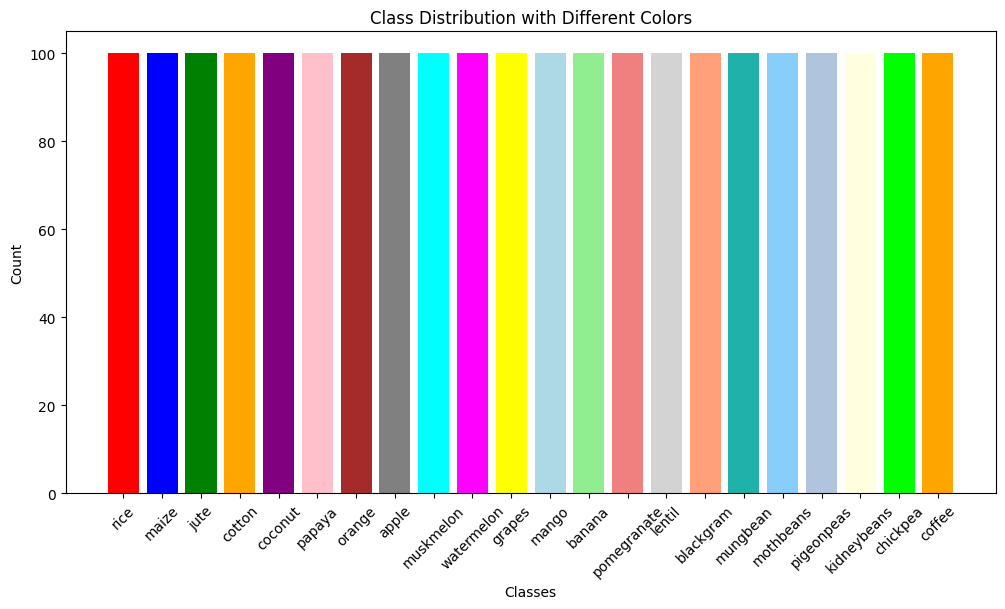

In [ ]:
import matplotlib.pyplot as plt
df_for_bar = df['label'].value_counts().reset_index()
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'brown', 'gray', 'cyan', 'magenta', 'yellow', 'lightblue', 'lightgreen', 'lightcoral', 'lightgray', 'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightsteelblue', 'lightyellow', 'lime','orange']

plt.figure(figsize=(12, 6))
bars = plt.bar(df_for_bar['index'], df_for_bar['label'], color=colors)

plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Class Distribution with Different Colors')
plt.xticks(rotation=45)
plt.show()

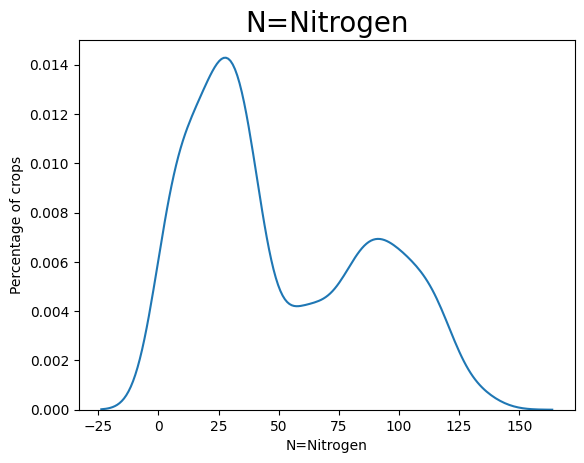

In [ ]:
sns.kdeplot(x=df['N=Nitrogen'])
plt.ylabel('Percentage of crops')
plt.title("N=Nitrogen",size=20)
plt.show()

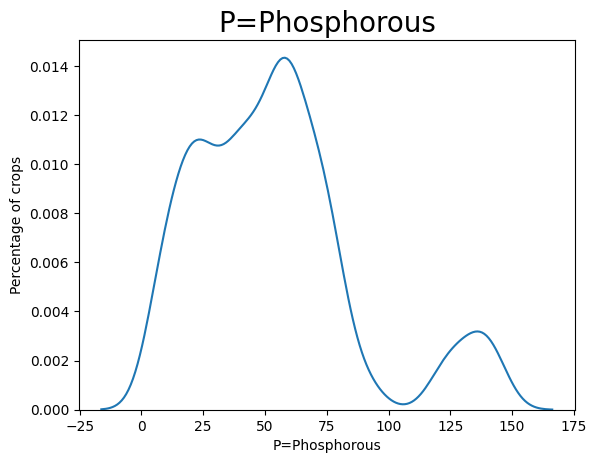

In [ ]:
sns.kdeplot(x=df['P=Phosphorous'])
plt.ylabel('Percentage of crops')
plt.title("P=Phosphorous",size=20)
plt.show()

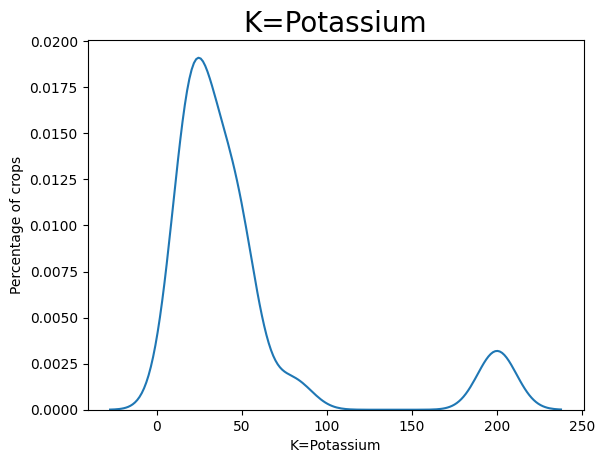

In [ ]:
sns.kdeplot(x=df['K=Potassium'])
plt.ylabel('Percentage of crops')
plt.title("K=Potassium",size=20)
plt.show()

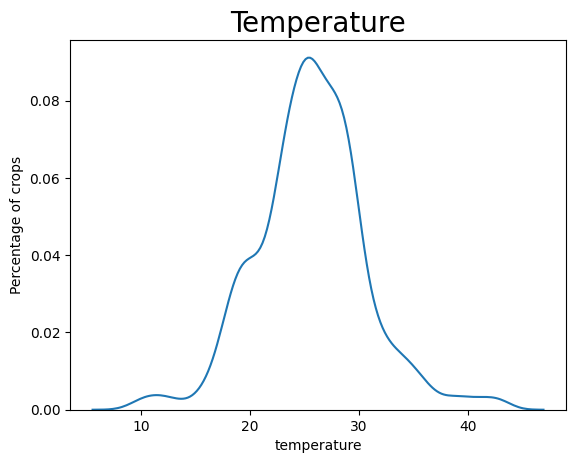

In [ ]:
sns.kdeplot(x=df['temperature'])
plt.ylabel('Percentage of crops')
plt.title("Temperature",size=20)
plt.show()

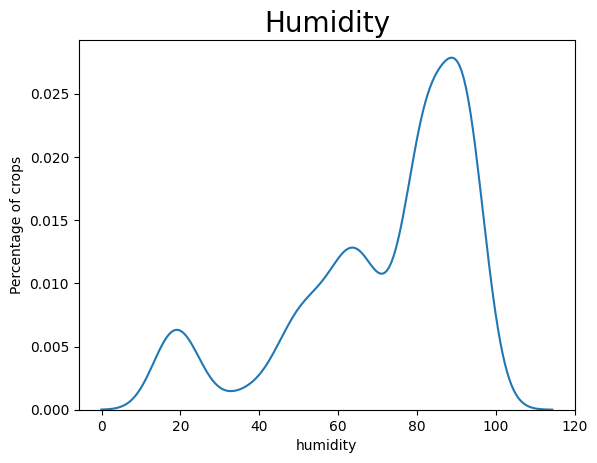

In [ ]:
sns.kdeplot(x=df['humidity'])
plt.ylabel('Percentage of crops')
plt.title("Humidity",size=20)
plt.show()

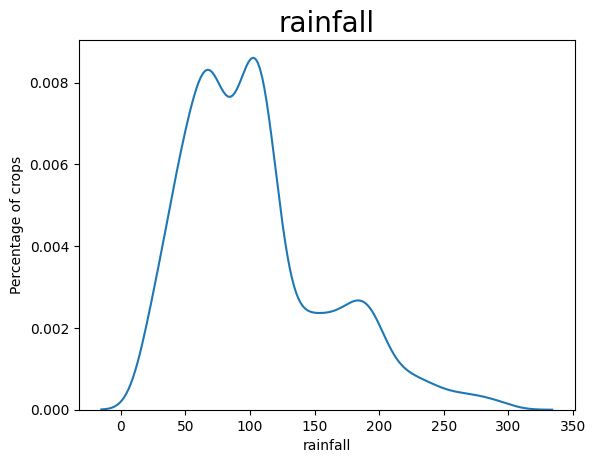

In [ ]:
sns.kdeplot(x=df['rainfall'])
plt.ylabel('Percentage of crops')
plt.title("rainfall",size=20)
plt.show()

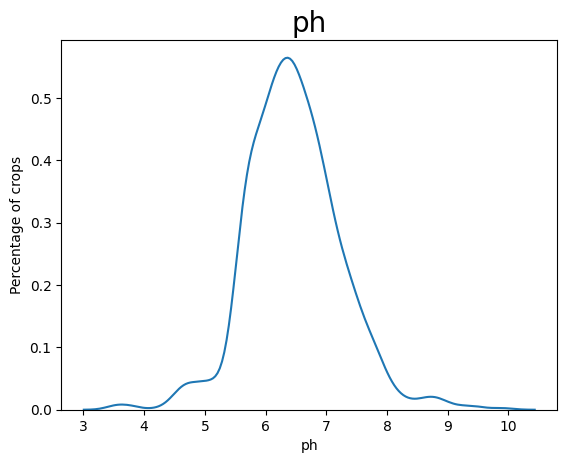

In [ ]:
sns.kdeplot(x=df['ph'])
plt.ylabel('Percentage of crops')
plt.title("ph",size=20)
plt.show()

**PREDICTION**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#SVM
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = df[['N=Nitrogen', 'P=Phosphorous',	'K=Potassium'	,'temperature'	,'humidity'	,'ph'	,'rainfall']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{report}")


Accuracy: 0.9795454545454545
Confusion Matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 20  0  0  0  0  0  0  0  0  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0 

In [ ]:
#random forest
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = df[['N=Nitrogen', 'P=Phosphorous',	'K=Potassium', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{report}")


Accuracy: 0.9931818181818182
Confusion Matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 23  0  0  0  0 

In [ ]:
#KNN
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
X = df[['N=Nitrogen', 'P=Phosphorous',	'K=Potassium', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_encoded = knn_model.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
accuracy = accuracy_score(y_test, y_pred_encoded)
confusion = confusion_matrix(y_test, y_pred_encoded)
report = classification_report(y_test, y_pred_encoded)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{report}")


Accuracy: 0.9704545454545455
Confusion Matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0 22  0  0  0  0 

In [ ]:
#decision tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = df[['N=Nitrogen', 'P=Phosphorous',	'K=Potassium', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_encoded = decision_tree_model.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
accuracy = accuracy_score(y_test, y_pred_encoded)
confusion = confusion_matrix(y_test, y_pred_encoded)
report = classification_report(y_test, y_pred_encoded)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{report}")


Accuracy: 0.9863636363636363
Confusion Matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1  0  0 22  0  0  0  0 

In [ ]:
#logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = df[['N=Nitrogen', 'P=Phosphorous',	'K=Potassium'	,'temperature'	,'humidity'	,'ph'	,'rainfall']]
y = df['label']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
logistic_regression_model = LogisticRegression(max_iter=1000)  # Increase max_iter
logistic_regression_model.fit(X_train, y_train)
y_pred_encoded = logistic_regression_model.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
accuracy = accuracy_score(y_test, y_pred_encoded)
confusion = confusion_matrix(y_test, y_pred_encoded)
report = classification_report(y_test, y_pred_encoded)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{report}")


Accuracy: 0.95
Confusion Matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0  2  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 20  0  0  0  0  0  0  0  0  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  1  0  0 21  0  0  0  0  0  0  0  0]
 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Gradient Boosting
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
X = df[['N=Nitrogen', 'P=Phosphorous',	'K=Potassium'	,'temperature'	,'humidity'	,'ph'	,'rainfall']]
y = df['label']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting_model.fit(X_train, y_train)

y_pred_encoded = gradient_boosting_model.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

accuracy = accuracy_score(y_test, y_pred_encoded)
confusion = confusion_matrix(y_test, y_pred_encoded)
report = classification_report(y_test, y_pred_encoded)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{report}")


Accuracy: 0.9818181818181818
Confusion Matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 23  0  0  0  0 

In [ ]:
#The accuracy of SVM is: 97
#The accuracy of Random Forest is: 99
#The accuracy of KNN is: 97
#The accuracy of Decision Tree is: 98
#The accuracy of Logistic Regression is: 95
#The accuracy of Gradient Boosting is: 98

In [ ]:
#Therefore the best model is Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,shuffle=True,random_state=0)

In [ ]:
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1330
[LightGBM] [Info] Number of data points in the train set: 1540, number of used features: 7
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.105431
[LightGBM] [Info] Start training from score -3.149883
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -3.076858
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.105431
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -2.982829
[LightGBM] [Info] Start training from score -3.049078
[LightGBM] [Info] Start training from score -3.062872
[LightGB

LGBMClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model Accuracy score:{0:0.4f}'.format(accuracy_score(y_test,y_pred)))

LightGBM Model Accuracy score:0.9894


In [ ]:
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9893939393939394
Confusion Matrix:
[[28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 27  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 21  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 36  0  0  0  0 

In [ ]:
#Neural network
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dropout
import matplotlib.pyplot as plt

In [ ]:
path_train = r"/content/Real_Time_Crop_recommendation system.csv"
train_data = pd.DataFrame(pd.read_csv(path_train))
print(train_data.head())

   N=Nitrogen  P=Phosphorous  K=Potassium  temperature   humidity        ph  \
0          90             42           43    20.879744  82.002744  6.502985   
1          85             58           41    21.770462  80.319644  7.038096   
2          60             55           44    23.004459  82.320763  7.840207   
3          74             35           40    26.491096  80.158363  6.980401   
4          78             42           42    20.130175  81.604873  7.628473   

     rainfall label  
0  202.935536  rice  
1  226.655537  rice  
2  263.964248  rice  
3  242.864034  rice  
4  262.717340  rice  


In [ ]:
print(train_data['label'].unique())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [ ]:
Y_train = train_data['label']
X_train = train_data.drop('label', axis = 1)
print(X_train.head())
print("")
print(Y_train.head())

   N=Nitrogen  P=Phosphorous  K=Potassium  temperature   humidity        ph  \
0          90             42           43    20.879744  82.002744  6.502985   
1          85             58           41    21.770462  80.319644  7.038096   
2          60             55           44    23.004459  82.320763  7.840207   
3          74             35           40    26.491096  80.158363  6.980401   
4          78             42           42    20.130175  81.604873  7.628473   

     rainfall  
0  202.935536  
1  226.655537  
2  263.964248  
3  242.864034  
4  262.717340  

0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object


In [ ]:
Encoder = OneHotEncoder(handle_unknown='ignore')

Y_train = pd.DataFrame(Encoder.fit_transform(train_data[['label']]).toarray())

print(Y_train)

       0    1    2    3    4    5    6    7    8    9   ...   12   13   14  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2195  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2196  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2197  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2198  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2199  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       15   16   17   18   19   20   21  
0     0.0  0.0  0.0  

In [ ]:
sc = StandardScaler()
train_scaled = sc.fit_transform(X_train)
print(train_scaled)
data = train_scaled

[[ 1.0687974  -0.34455075 -0.1016875  ...  0.47266646  0.04330173
   1.8103605 ]
 [ 0.93332887  0.14061552 -0.14118477 ...  0.39705125  0.73487256
   2.24205791]
 [ 0.25598625  0.04964684 -0.08193887 ...  0.48695381  1.77151047
   2.92106603]
 ...
 [ 1.82742114 -0.61745677 -0.35841972 ... -0.19123516 -0.13812031
   1.27141766]
 [ 1.80032743 -0.64777967 -0.27942519 ... -0.86951801  0.37390383
   0.43154519]
 [ 1.44810927 -1.07230015 -0.35841972 ... -0.49802006  0.40109573
   0.68200518]]


In [ ]:
model = Sequential()
model.add(Dense(1000, activation='relu', input_shape=(data.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(500, activation='tanh'))
model.add(Dense(22, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train,Y_train, epochs = 100)

Epoch 1/100
69/69 [==============================] - 1s 10ms/step - loss: 1.5222 - accuracy: 0.5141
Epoch 2/100
69/69 [==============================] - 1s 10ms/step - loss: 0.6112 - accuracy: 0.8059
Epoch 3/100
69/69 [==============================] - 1s 10ms/step - loss: 0.3943 - accuracy: 0.8777
Epoch 4/100
69/69 [==============================] - 1s 10ms/step - loss: 0.2873 - accuracy: 0.9086
Epoch 5/100
69/69 [==============================] - 1s 10ms/step - loss: 0.2213 - accuracy: 0.9286
Epoch 6/100
69/69 [==============================] - 1s 10ms/step - loss: 0.2041 - accuracy: 0.9232
Epoch 7/100
69/69 [==============================] - 1s 10ms/step - loss: 0.1986 - accuracy: 0.9336
Epoch 8/100
69/69 [==============================] - 1s 10ms/step - loss: 0.1723 - accuracy: 0.9350
Epoch 9/100
69/69 [==============================] - 1s 11ms/step - loss: 0.1879 - accuracy: 0.9309
Epoch 10/100
69/69 [==============================] - 1s 15ms/step - loss: 0.1666 - accuracy: 0.9336